In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os

rand = random.SystemRandom()

In [70]:
def pick_random_img(path):
    img_name = rand.choice(os.listdir(path))
    img_abspath = os.path.join(path, img_name)
    img = plt.imread(img_abspath)
    return img

def plot_comparison(raw_img, masked_img):
    fig, axs = plt.subplots(1, 2)
    for i, img in zip(range(2), [raw_img, masked_img]):
        axs[i].imshow(img, cmap = 'gray')

def cloud_mask(img):
    # pixels with high values of white colour
    # are assumed to be clouds
    # convert to HSV color space
    hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    # white color boundaries
    lower_boundary = np.array([0, 0, 170], dtype = np.uint8)
    upper_boundary = np.array([255, 170, 255], dtype = np.uint8)
    # create a white mask
    mask = cv2.inRange(hsv_img, lower_boundary, upper_boundary)
    kernel = np.ones((1, 1), np.uint8)
    # increase size of white regions with white mask
    masked_img = cv2.dilate(mask, kernel, iterations=1)
    return masked_img

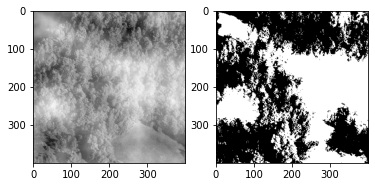

In [71]:
DATASET = "../data/cloud_data/rsscn7/test_dataset/eForest"

img = pick_random_img(DATASET)
gs_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

masked_img = cloud_mask(img)

plot_comparison(gs_img, masked_img)